### CodeCraft Infotech Data Science Task 3:
Name: Armand Faris A Surbakti

In this 3rd Data Science project, I am given a task  build a decision tree classifier to predict weather a customer will purchase a product or service based on their demographic and behavioral data. The dataset I'll be using is from this UCI repository: https://archive.ics.uci.edu/dataset/222/bank+marketing

Let's Import our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import sklearn packages for decision trees
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

#warnings
import warnings
warnings.filterwarnings('ignore')

Let's load the data and analyze it

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


This seems clean and organized, but I'll do one more check of missing values

In [5]:
#check for missing/null values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


This is clean and no empty values. We'll now choose the columns that we'd like to select as features for this decision Tree.

Ideally, we'd like categorical columns, since we want features of data of behaviours and their attributes.

We can see here below that the y is the target features for a yes or no subscription to a bank deposit.

In [6]:
feat_df = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]
feat_df

,job,marital,education,default,housing,loan,y
0,housemaid,married,basic.4y,no,no,no,no
1,services,married,high.school,unknown,no,no,no
2,services,married,high.school,no,yes,no,no
3,admin.,married,basic.6y,no,no,no,no
4,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,yes
41184,blue-collar,married,professional.course,no,no,no,no
41185,retired,married,university.degree,no,yes,no,no
41186,technician,married,professional.course,no,no,no,yes


In [7]:
#let's describe the features
feat_df.describe()

,job,marital,education,default,housing,loan,y
count,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2
top,admin.,married,university.degree,no,yes,no,no
freq,10422,24928,12168,32588,21576,33950,36548


Let's plot some count plots on these columns to visualize data.

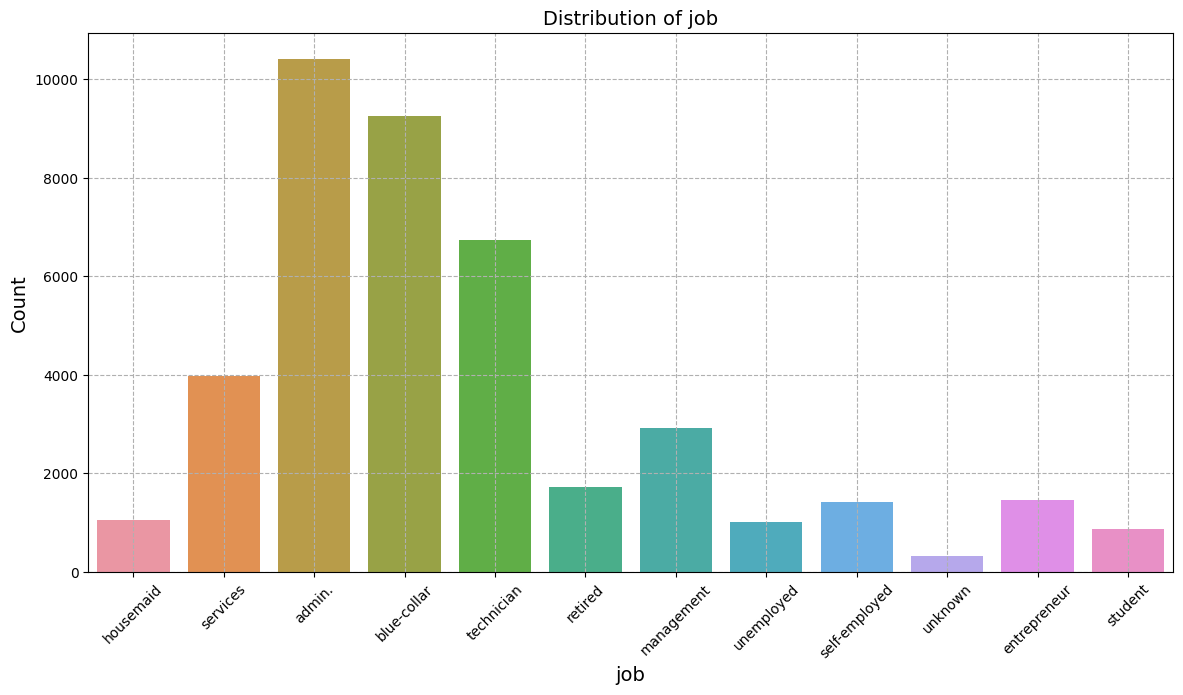

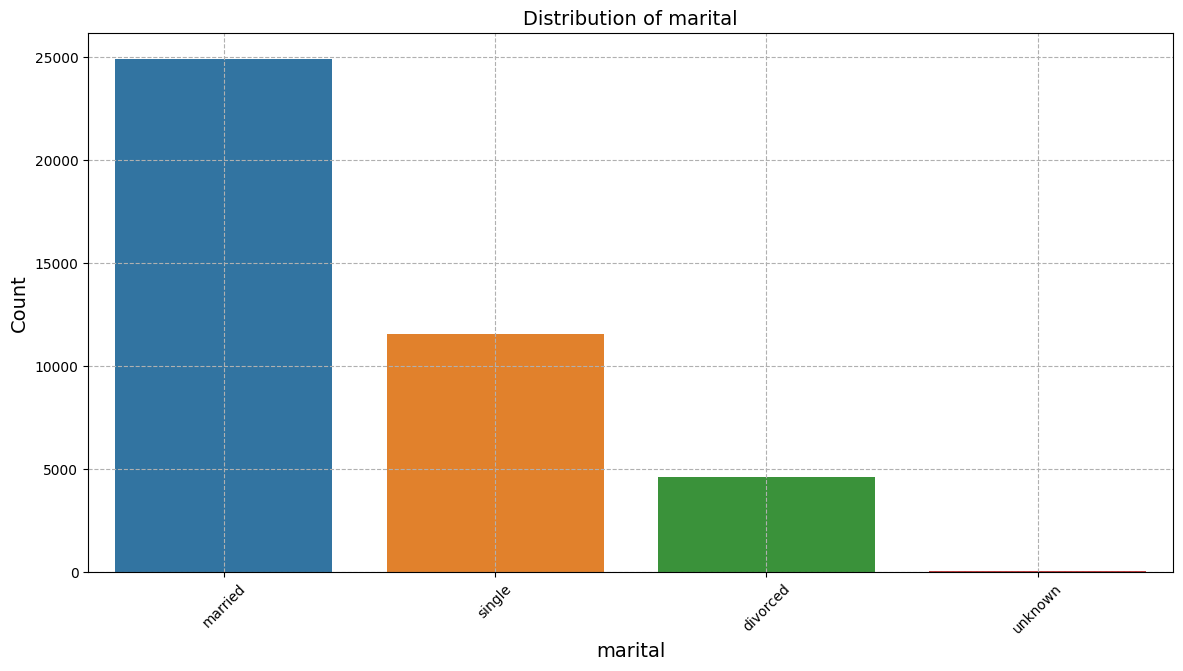

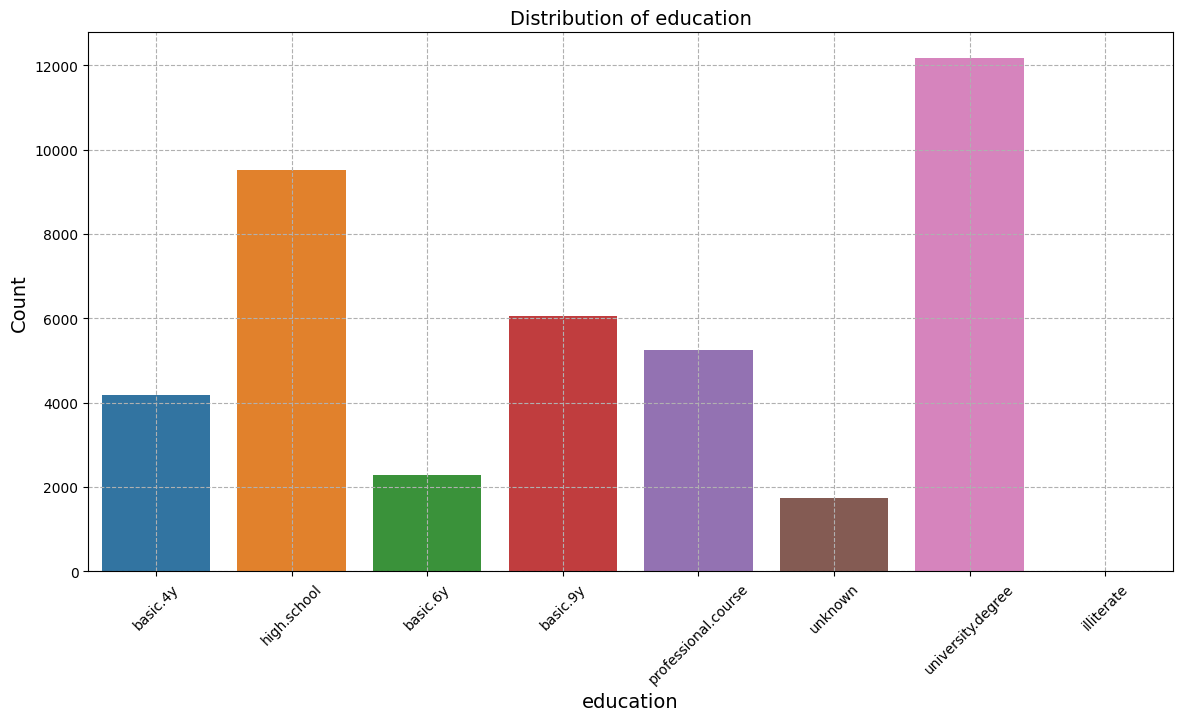

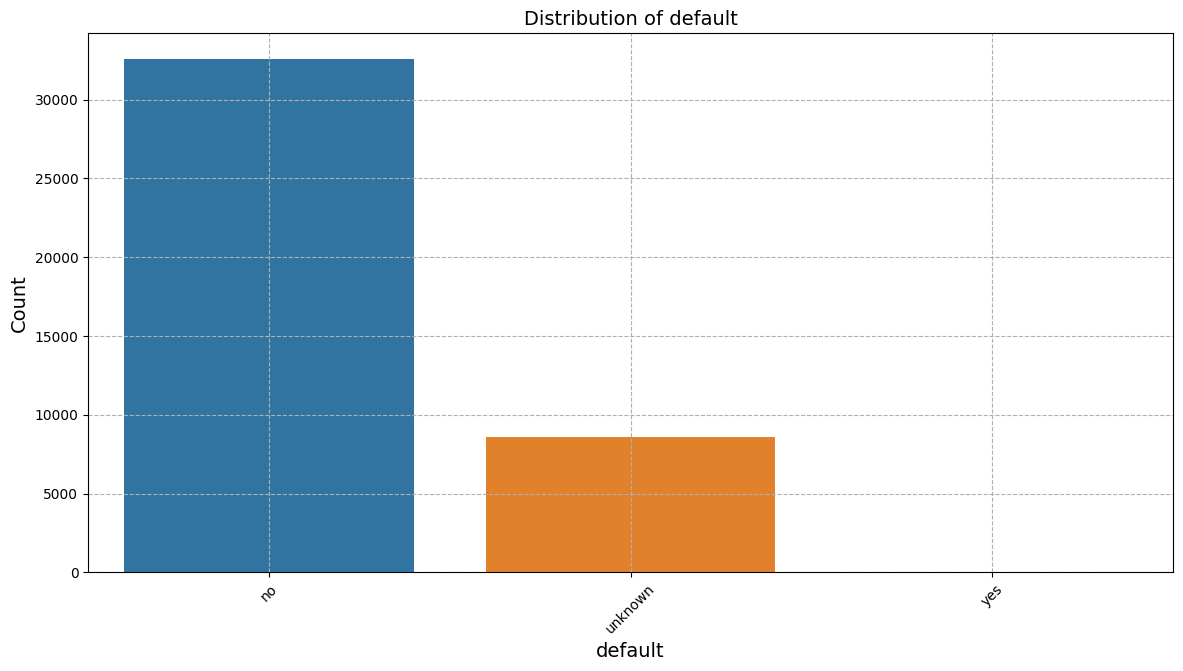

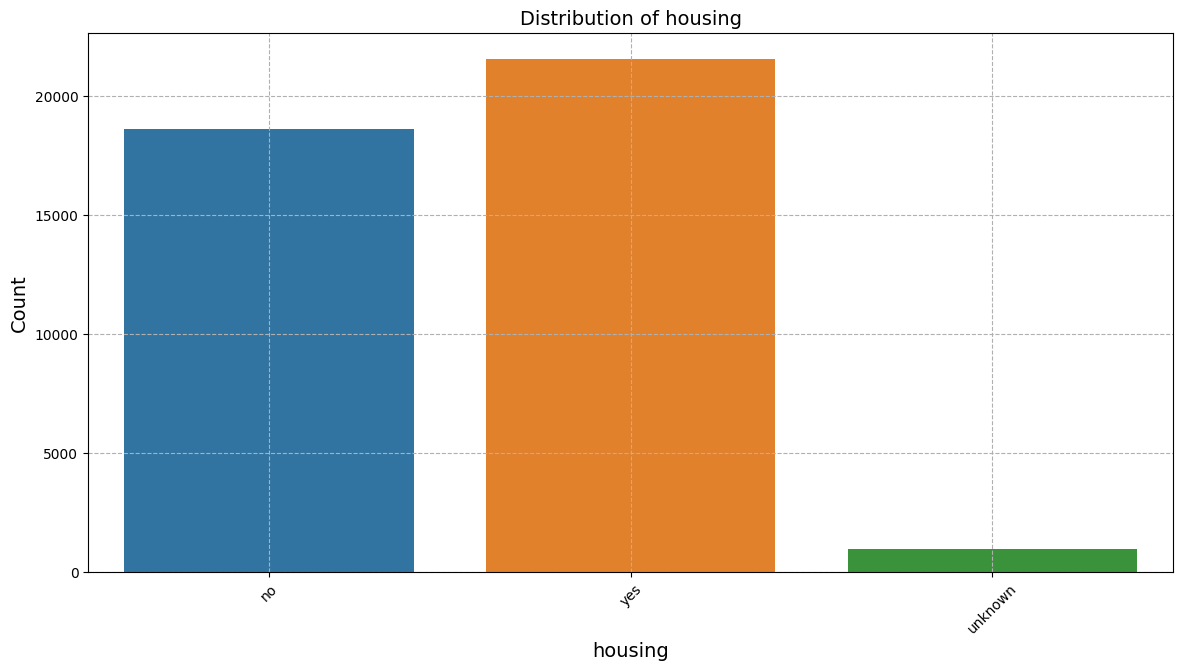

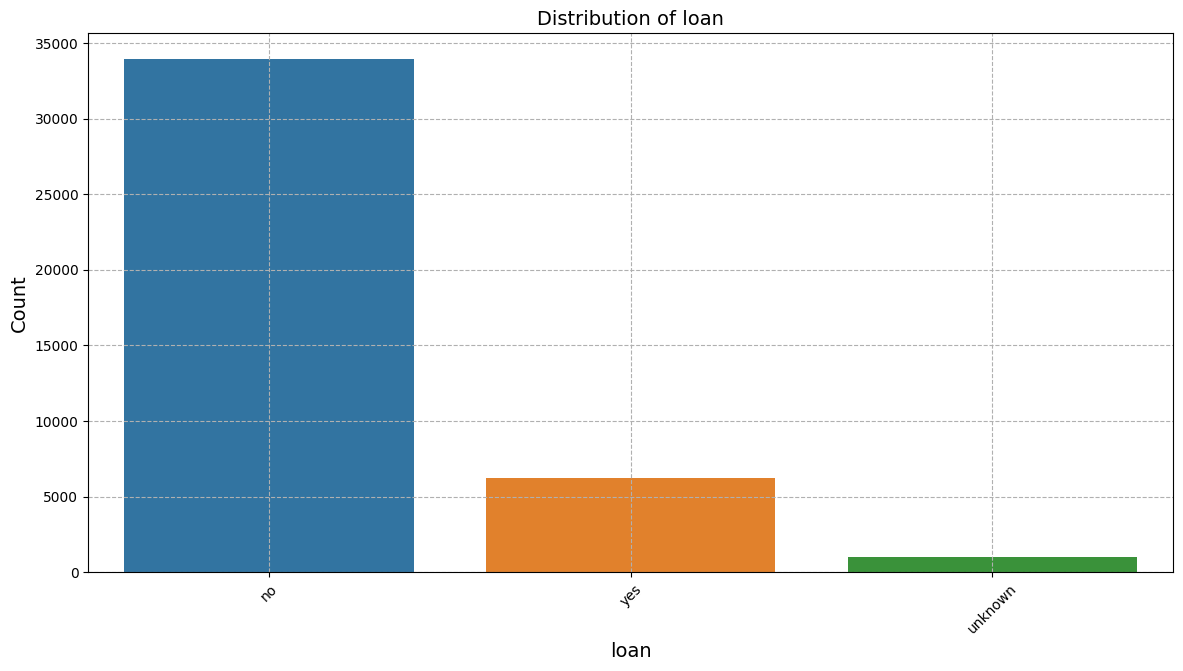

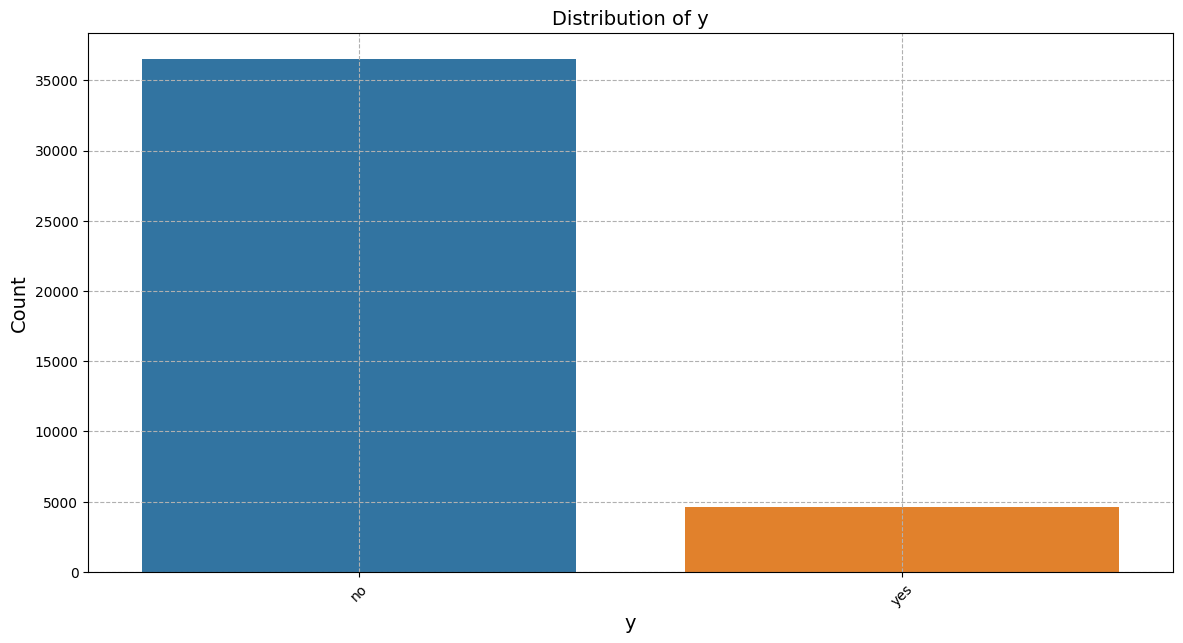

In [8]:
#count plots
categorical_feats = feat_df.select_dtypes(include='object').columns

#for loop to iterate plotting over each columns
for col in categorical_feats:
    plt.figure(figsize=(14, 7))
    sns.countplot(x=col, data=feat_df)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(f'{col}', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout
    plt.grid(linestyle='--')
    plt.show()


Obviously since this is a supervised learning task, we need to visualize numerical features.

It's best to plot this  using a correlation heatmap

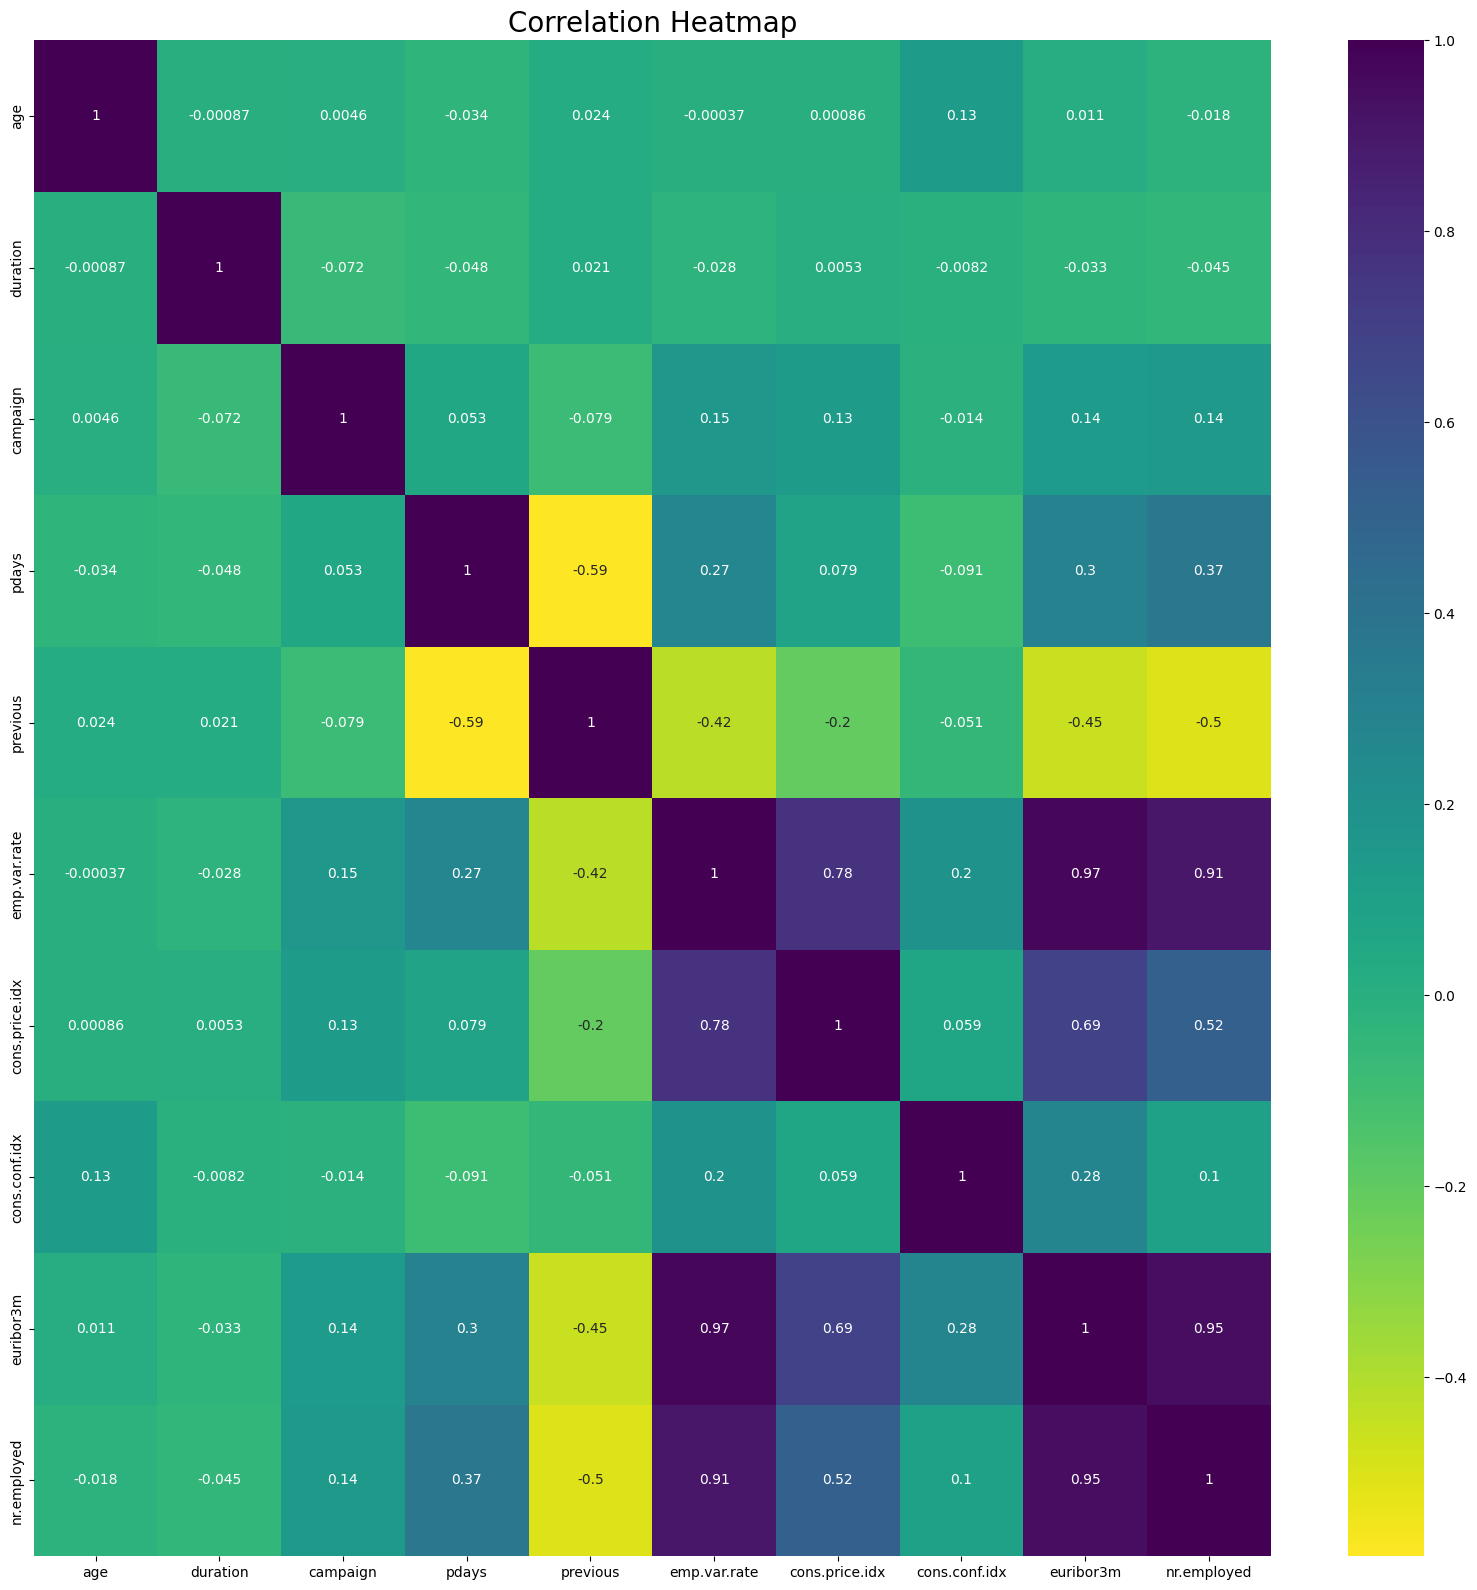

In [9]:
#plotting on a histogram.
numerical_feats = df.select_dtypes(include=['int64', 'float64']).columns

#create correlation heatmap
plt.figure(figsize=(16,16))
sns.heatmap(df[numerical_feats].corr(), annot=True, cmap='viridis_r')
plt.title('Correlation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()
        

### Machine Learning Decision Tree Process
Here, we'll be initializing the decision tree process. Let's start by choosing our features and target variables

In [10]:
#trained value
X = feat_df.drop('y', axis=1)
#target value
y = feat_df['y']

Next, I'll perform one-hot encoding on the data

In short, one-hot encoding converts categorical data (non-numeric) into a numerical format that machine learning models can process.

This creates a binary column

In [11]:
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = encoder.fit_transform(X)

print(encoded_cols)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


Define the training and testing data. Using sklearn's train_test_split function, we can initialize and split the dataset, around 70% training and 30% testing

In [22]:
#Define the train and test data:
X_train, X_test, y_train, y_test = train_test_split(encoded_cols, y, test_size=0.3, random_state=0)

Next, we'll get information about the train and test dimensions

In [23]:
#print the train and test  dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28831, 27), (12357, 27), (28831,), (12357,))

Let's now create the Decision Tree Classifier. Here I'll be using the entropy decision tree. Entropy measures the randomness or uncertainty in the target variable. 

Entropy measures the randomness of a dataset, while the max_depth parameter prevents the tree from getting too complex and overfitting.

In [24]:
dect_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state = 0)
#train the entropy decision tree classifier
clf_entropy = dect_entropy.fit(X_train, y_train)

After training, let's do a prediction

In [25]:
y_pred =clf_entropy.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

Now, let's print out the accuracy score to find out our accuracy.

In [26]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8875940762320952


To ensure our model isn't overfitting, let's add cross-validation to the test data. We'll put in a value of 5 to the cv parameter

In [27]:
scores = cross_val_score(dect_entropy, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: ", scores.mean())

Cross-Validation Accuracy:  0.8871006957006149


There's a tiny bit improvement there.

Now, let's add a classification report. This is to add other metrics like precision, recall, and F1-score.

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94     10969
         yes       0.00      0.00      0.00      1388

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



Last evaluation, Let us add model evaluation using ROC and AUC

In [29]:
print("ROC-AUC Score: ", roc_auc_score(pd.get_dummies(y_test, drop_first=True), clf_entropy.predict_proba(X_test)[:, 1]))       

ROC-AUC Score:  0.6374530935097944


Let's plot our ROC curve:

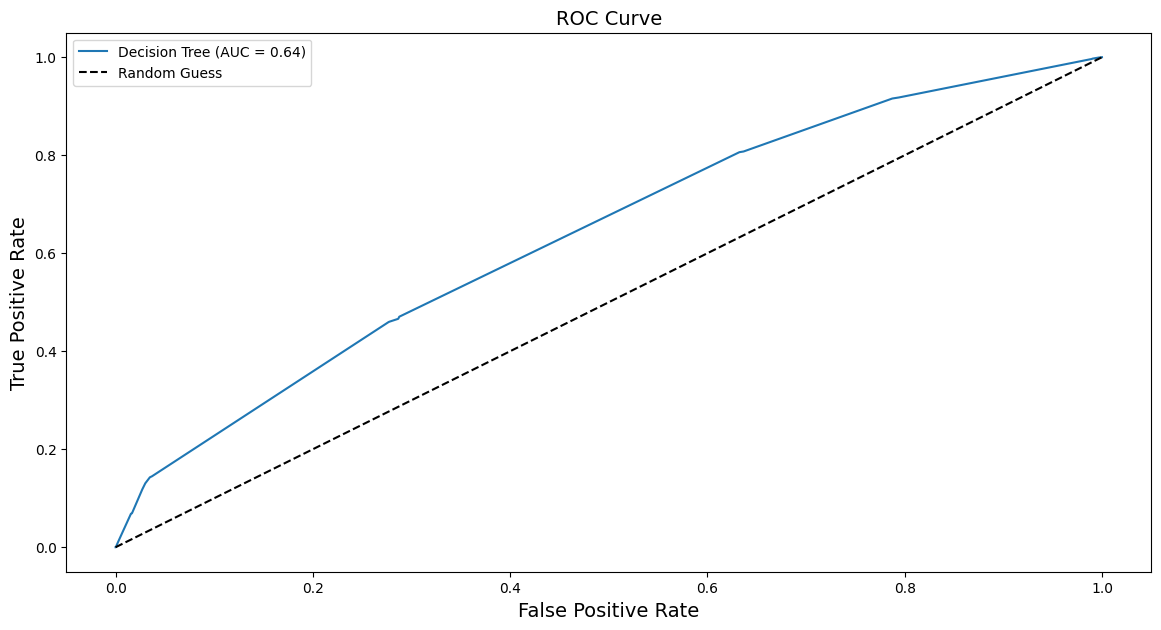

In [30]:
fpr, tpr, _ = roc_curve(pd.get_dummies(y_test, drop_first=True), clf_entropy.predict_proba(X_test)[:, 1])
plt.figure(figsize=(14, 7))
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(pd.get_dummies(y_test, drop_first=True), clf_entropy.predict_proba(X_test)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=14)
plt.legend()
plt.show()

Let's visualize our decision tree

[Text(0.6032608695652174, 0.9166666666666666, 'x[21] <= 0.5\nentropy = 0.508\nsamples = 28831\nvalue = [25579, 3252]'),
 Text(0.3423913043478261, 0.75, 'x[4] <= 0.5\nentropy = 0.553\nsamples = 22846\nvalue = [19909, 2937]'),
 Text(0.17391304347826086, 0.5833333333333334, 'x[7] <= 0.5\nentropy = 0.534\nsamples = 21910\nvalue = [19243, 2667]'),
 Text(0.08695652173913043, 0.4166666666666667, 'x[19] <= 0.5\nentropy = 0.518\nsamples = 21361\nvalue = [18879, 2482]'),
 Text(0.043478260869565216, 0.25, 'x[0] <= 0.5\nentropy = 0.473\nsamples = 14099\nvalue = [12673, 1426]'),
 Text(0.021739130434782608, 0.08333333333333333, 'entropy = 0.503\nsamples = 9885\nvalue = [8788, 1097]'),
 Text(0.06521739130434782, 0.08333333333333333, 'entropy = 0.395\nsamples = 4214\nvalue = [3885, 329]'),
 Text(0.13043478260869565, 0.25, 'x[10] <= 0.5\nentropy = 0.598\nsamples = 7262\nvalue = [6206, 1056]'),
 Text(0.10869565217391304, 0.08333333333333333, 'entropy = 0.596\nsamples = 7231\nvalue = [6185, 1046]'),
 Tex

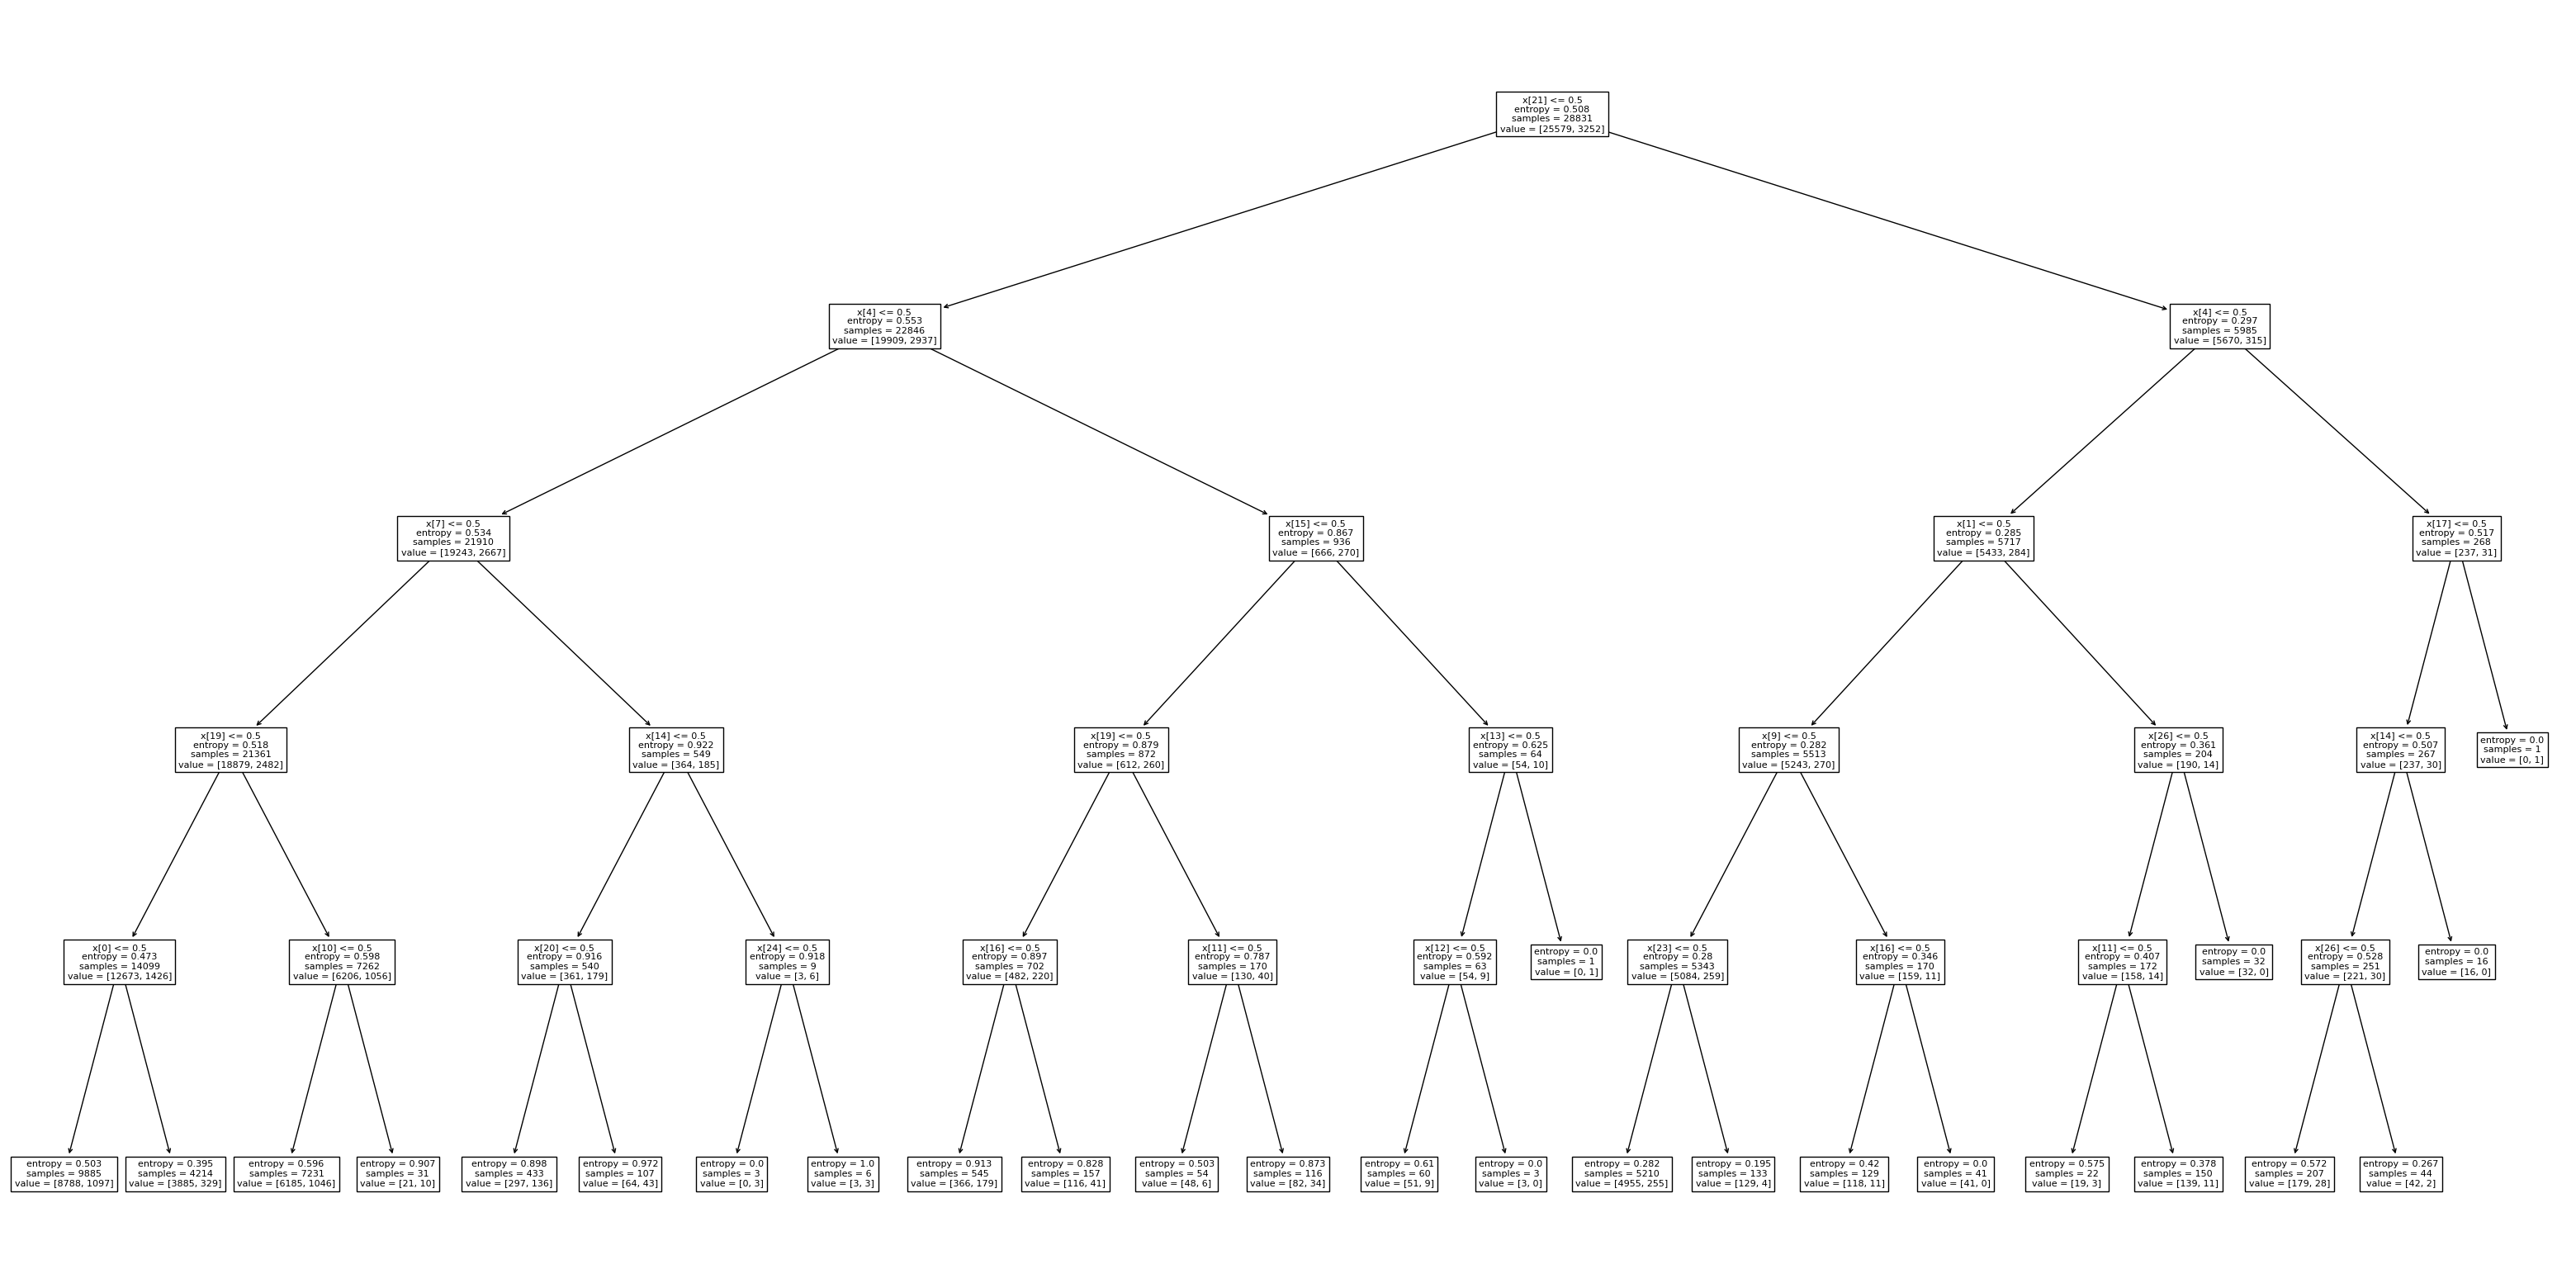

In [31]:
#Plot the decision tree
plt.figure(figsize=(40,20))
plot_tree(clf_entropy.fit(X_train, y_train))